## Python Example:
Demonstration of 1 branch of a filter bank in direct implementation for N=16 subbands, and subband k=1 #Gerald Schuller, October 2016.

## Import the modules and define the variable:

In [1]:
%matplotlib inline
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import sound as snd
import os

N = 16

## FIlter Design:

In [2]:
b = signal.remez(8*N, [0,500,1000,2000,2500,16000], [0,1,0], [100,1,100], Hz=32000, type='bandpass')

## Check the design and plot the impulse response:

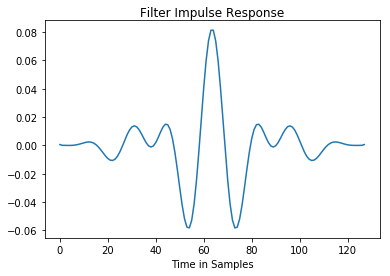

In [3]:
plt.plot(b)
plt.title('Filter Impulse Response')
plt.xlabel('Time in Samples')
plt.show()

# Plot the frequency response:

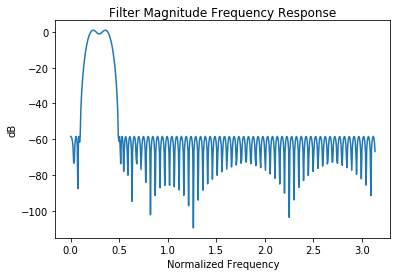

In [4]:
w, H=signal.freqz(b)
plt.plot(w, 20*np.log10(np.abs(H)+1e-6))
plt.title('Filter Magnitude Frequency Response')
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.show()

## Analysis Filtering:

In [5]:
print("Attention: Recording for 8s!")
os.system('espeak -ven -s 140 '+'"Attention: Recording for 8 seconds!"')
s=snd.record(8, 32000)
print("length of sound in samples: ", len(s))

Attention: Recording for 8s!
('device count=', 12L)
('i = ', 0)
('max Input Channels=', 2L)
('default Sample Rate=', 44100.0)
('i = ', 1)
('max Input Channels=', 2L)
('default Sample Rate=', 44100.0)
('i = ', 2)
('max Input Channels=', 0L)
('default Sample Rate=', 44100.0)
('i = ', 3)
('max Input Channels=', 0L)
('default Sample Rate=', 44100.0)
('i = ', 4)
('max Input Channels=', 2L)
('default Sample Rate=', 44100.0)
('i = ', 5)
('max Input Channels=', 2L)
('default Sample Rate=', 44100.0)
('i = ', 6)
('max Input Channels=', 0L)
('default Sample Rate=', 44100.0)
('i = ', 7)
('max Input Channels=', 0L)
('default Sample Rate=', 44100.0)
('i = ', 8)
('max Input Channels=', 0L)
('default Sample Rate=', 44100.0)
('i = ', 9)
('max Input Channels=', 2L)
('default Sample Rate=', 44100.0)
('i = ', 10)
('max Input Channels=', 2L)
('default Sample Rate=', 44100.0)
('i = ', 11)
('max Input Channels=', 0L)
('default Sample Rate=', 44100.0)
* recording
('length of sound in samples: ', 256000)


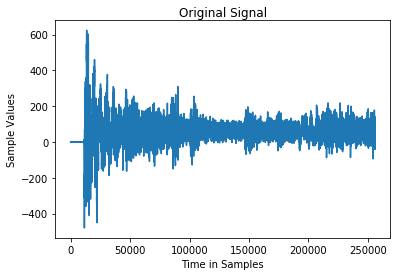

In [6]:
plt.plot(s)
plt.title('Original Signal')
plt.xlabel('Time in Samples')
plt.ylabel('Sample Values')
plt.show()

In [7]:
os.system('espeak -ven -s 140 '+'"Now hear the Original Signal"')
snd.sound(s / np.max(s) * 30000, 32000)

* done


## Filter Implementation:

In [8]:
filtered=signal.lfilter(b,1,s)
print("length of filtered sound in samples: ", len(filtered))

('length of filtered sound in samples: ', 256000)


## Plot the Filtered Signal:

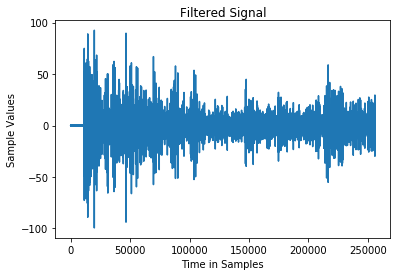

In [9]:
plt.plot(filtered)
plt.title('Filtered Signal')
plt.xlabel('Time in Samples')
plt.ylabel('Sample Values')
plt.show()

## Play the filtered sound:

In [10]:
os.system('espeak -ven -s 140 '+'"Now hear the filtered Signal"')
snd.sound(filtered/np.max(filtered)*30000, 32000)

* done


## Now Down-sampling with factor N:

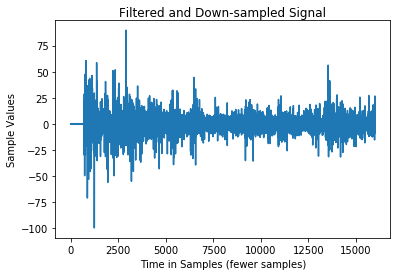

In [11]:
N=16
filteredds=filtered[::N]
plt.plot(filteredds)
plt.title('Filtered and Down-sampled Signal')
plt.xlabel('Time in Samples (fewer samples)')
plt.ylabel('Sample Values')
plt.show()

## Listen to it at `1/N'th` sampling rate:

In [12]:
os.system('espeak -ven -s 140 '+'"Now hear the filtered and down-sampled Signal at the low sampling rate"')
snd.sound(filteredds/np.max(filteredds)*30000, 2000)

* done


## Upsampling:

In [13]:
filteredus=np.zeros(len(filteredds)*N)
filteredus[::N]=filteredds

## Plot the upsampled signal:

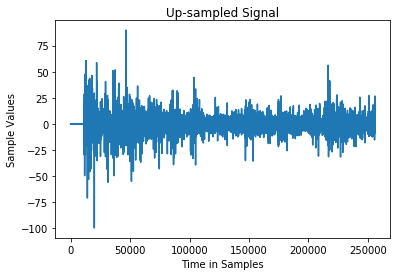

In [14]:
plt.plot(filteredus)
plt.title('Up-sampled Signal')
plt.xlabel('Time in Samples')
plt.ylabel('Sample Values')
plt.show()

## Listen to the up-sampled sound:

In [15]:
os.system('espeak -ven -s 140 '+'"Now hear the up-sampled Signal back at the higher sampling rate"')
snd.sound(filteredus/np.max(filteredus)*30000, 32000)

* done


* Synthesis Filtering:<br/>
Bandpass Synthesis Filter implementation to attenuate the spectral copies:

In [16]:
filteredsyn=signal.lfilter(b,1,filteredus)

## Plot the upsampled and filtered version of the signal:

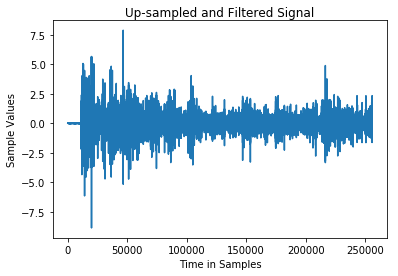

In [17]:
plt.plot(filteredsyn)
plt.title('Up-sampled and Filtered Signal')
plt.xlabel('Time in Samples')
plt.ylabel('Sample Values')
plt.show()

In [18]:
os.system('espeak -ven -s 140 '+'"Now hear the up-sampled and filtered signal"')
snd.sound(filteredsyn/np.max(filteredsyn)*30000, 32000)

* done
